In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")
import sklearn
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Binary Logistic Regression

In [2]:
data = pd.read_csv("../../datasets/log_reg_bin.csv")
data.head()

,oxygen,survive
0,10,0
1,5,0
2,75,1
3,14,0
4,8,0


### Splitting dataset into training and testing data

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0], data.iloc[:,1], test_size = 0.25, random_state = 42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

11 11 4 4


### Visualizing the training data

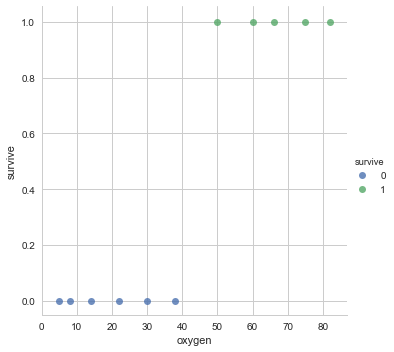

In [4]:
train = pd.DataFrame([X_train.reset_index(drop=True), y_train.reset_index(drop=True)]).T.reindex(columns = ["oxygen", "survive"])
sns.lmplot("oxygen", "survive", data = train, hue='survive', fit_reg=False)

### Building logistic regression model

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train.iloc[:,0].values.reshape(-1,1), train.iloc[:,1].values.reshape(-1,1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Parameters

In [6]:
model.intercept_

array([-1.41956612])

In [7]:
model.coef_

array([[0.04616302]])

### Estimated values

Training Accuracy:  90.9090909090909
Testing Accuracy:  75.0


(<matplotlib.figure.Figure at 0x2e8d91ec0f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2e8d91ec908>)

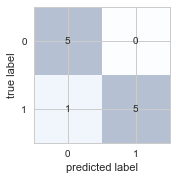

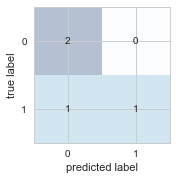

In [8]:
est = model.predict(train.iloc[:,0].values.reshape(-1,1))
est

# Training
print('Training Accuracy: ', model.score(train.iloc[:,0].values.reshape(-1,1), train.iloc[:,1].values.reshape(-1,1)) * 100)
est = model.predict(train.iloc[:,0].values.reshape(-1,1))
actual = train.iloc[:,1].values.reshape(-1,1)
cm = metrics.confusion_matrix(actual, est, labels=pd.unique(train.iloc[:,1]))
plot_confusion_matrix(cm)

# Testing
print('Testing Accuracy: ', model.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)) * 100)
est = model.predict(X_test.values.reshape(-1,1))
actual = y_test.values.reshape(-1,1)
cm = metrics.confusion_matrix(actual, est, labels=pd.unique(y_test))
plot_confusion_matrix(cm)

### Logistic regression model graph

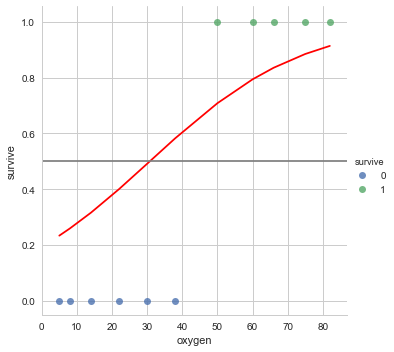

In [9]:
def model_curve(x):
    return 1 / (1 + np.exp(-x))
loss = model_curve(X_train.values.reshape(-1,1) * model.coef_ + model.intercept_).ravel()

sns.lmplot("oxygen", "survive", data = train, hue='survive', fit_reg=False)
plt.plot(np.sort(X_train),np.sort(loss), color = "red")
plt.axhline(.5, color='.5')

# Multinomial Logistic Regression

In [10]:
data = pd.read_csv("datasets/ML/log_reg_mul.csv")
data.head()

,budget,cars
0,100000,Toyota
1,250000,Toyota
2,500000,Toyota
3,750000,Toyota
4,1000000,Toyota


In [11]:
pd.unique(data.iloc[:,1])

array(['Toyota', 'Ferrari', 'Bugatti'], dtype=object)

### Splitting dataset into training and testing data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0], data.iloc[:,1], test_size = 0.25, random_state = 42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

11 11 4 4


### Building multinomial logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="multinomial", solver = "newton-cg")
model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

### Parameters

In [14]:
model.intercept_

array([-9.86086392,  0.14315378,  9.71771013])

In [15]:
model.coef_

array([[-0.00057775],
       [-0.00057926],
       [-0.00058583]])

### Estimated values and accuracy

Training Accuracy:  100.0
Testing Accuracy:  100.0


(<matplotlib.figure.Figure at 0x2e8d92c1668>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2e8d92c1e80>)

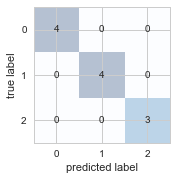

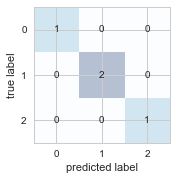

In [16]:
# Training
print('Training Accuracy: ', model.score(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1)) * 100)
est = model.predict(X_train.values.reshape(-1,1))
actual = y_train.values.reshape(-1,1)
cm = metrics.confusion_matrix(actual, est, labels=pd.unique(y_train))
plot_confusion_matrix(cm)

# Testing
print('Testing Accuracy: ', model.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)) * 100)
est = model.predict(X_test.values.reshape(-1,1))
actual = y_test.values.reshape(-1,1)
cm = metrics.confusion_matrix(actual, est, labels=pd.unique(y_test))
plot_confusion_matrix(cm)